In [63]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install openpyxl

In [6]:
medal_count.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [8]:
medal_count['Total'].mean()

11.612903225806452

In [10]:
#Weighted mean takes all values including the ouliers in the data
np.average(medal_count['Gold'],weights=medal_count['Total'])

14.743518518518519

In [12]:
#Trimmed mean does not consider the outliers avoids the extreme regions of values
trim_mean(medal_count['Gold'],0.1)

1.96

In [16]:
medal_count[['Total']].median()

Total    4.0
dtype: float64

In [21]:
def weighted_median(df,median_col,weight_col):
    df_sorted=df.sort_values(median_col)
    cumsum=df_sorted[weight_col].cumsum()
    cutoff=df_sorted[weight_col].sum()/2.
    return df_sorted[cumsum>=cutoff][median_col].iloc[0]
weighted_median(medal_count,'Total','Gold')

40

In [26]:
np.percentile(medal_count['Gold'],75)

3.0

In [27]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [29]:
##estimates of variability(Dispersion Metrics)
from statistics import variance,stdev
variance(medal_count['Gold'])

49.315100514259

In [30]:
stdev(medal_count['Gold'])

7.022471111671376

In [32]:
q3,q1=np.percentile(medal_count['Gold'],[75,25])
iqr=q3-q1

In [35]:
iqr,q3,q1

(3.0, 3.0, 0.0)

In [36]:
#Exploring the Data Distribution

<AxesSubplot:>

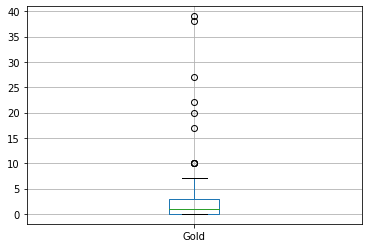

In [37]:
medal_count.boxplot(column='Gold')

In [38]:
frequency_table=medal_count.copy()
frequency_table['Freq']=pd.cut(medal_count['Gold'],10)
frequency_table.groupby('Freq')['Rank'].count().reset_index()

,Freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

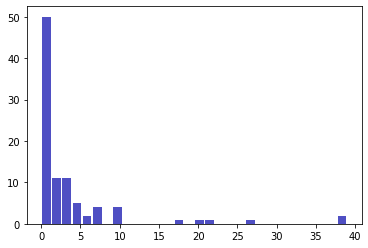

In [43]:
plt.hist(x=medal_count['Gold'],bins='auto',color='#0504aa',alpha=0.7,rwidth=0.85)

<AxesSubplot:ylabel='Density'>

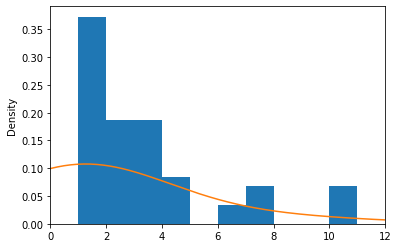

In [46]:
#Density Plots
ax=medal_count['Gold'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
medal_count['Gold'].plot.density(ax=ax)

In [47]:
#Exploring Binary and Categorical Data


In [48]:
#Mode
medal_count['Gold'].mode()

0    0
dtype: int64

Text(0, 0.5, 'Gold_Count')

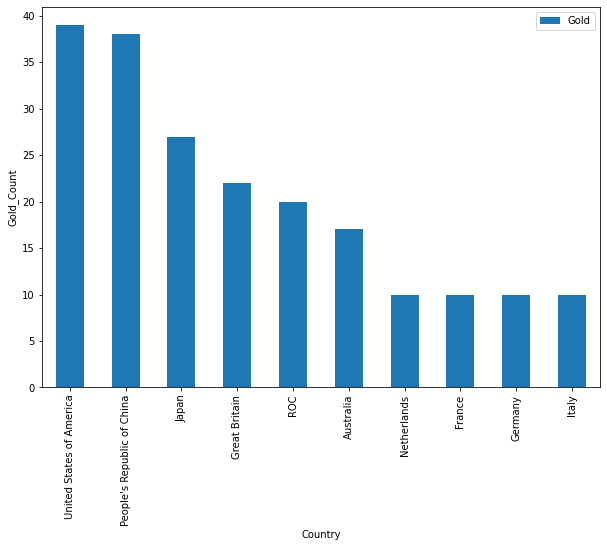

In [53]:
ax=medal_count.iloc[:10].plot.bar(x='Team/NOC',y='Gold',figsize=(10,7))
ax.set_xlabel('Country')
ax.set_ylabel('Gold_Count')

In [54]:
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

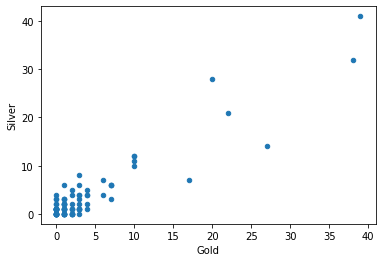

In [55]:
medal_count.plot.scatter(x='Gold',y='Silver')

<AxesSubplot:xlabel='Rank', ylabel='Gold'>

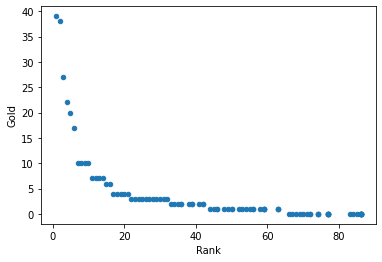

In [60]:
medal_count.plot.scatter(x='Rank',y='Gold')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

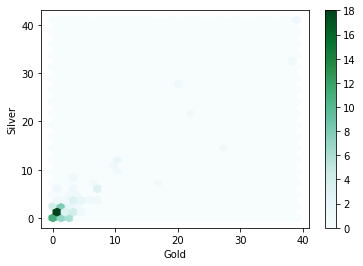

In [62]:
medal_count.plot.hexbin(x='Gold',y='Silver',gridsize=30,sharex=False)

C:\Users\keith\anaconda3\envs\ML_Models\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


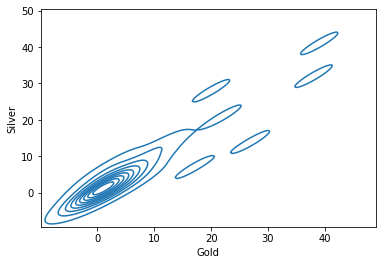

In [65]:
ax=sns.kdeplot(medal_count['Gold'],medal_count['Silver'])

<AxesSubplot:>

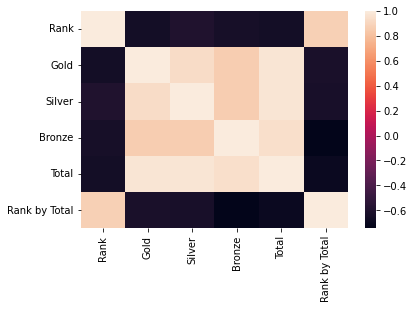

In [66]:
sns.heatmap(medal_count.corr())

In [77]:
crosstab=medal_count[['Silver','Gold']].pivot_table(index='Silver',columns='Gold',aggfunc=lambda x:len(x),margins=True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='Gold'>

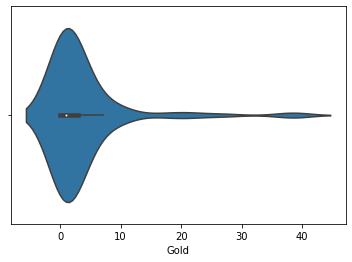

In [78]:
sns.violinplot(x=medal_count['Gold'])